In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d

player_df = pd.read_csv('player.csv')
player_df

player_df['full_name'] = player_df['name']
del player_df['name']
player_df

,Unnamed: 0,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,37,1.93,Germany,Gelsenkirchen,7.00,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,34,1.83,Switzerland,Morges,5.00,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,34,1.92,Germany,Schorndorf,0.90,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.30,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,23,1.89,Netherlands,Leiderdorp,75.00,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,510,Takuma Asano,28,1.73,Japan,"Komono, Mie",4.00,4.0,Attack - Right Winger,11,right,VfL Bochum,2024-06-30,2021-07-01,JEB ENTERTAINMENT ...,adidas
511,511,Philipp Hofmann,30,1.95,Germany,Arnsberg,2.50,2.5,Attack - Centre-Forward,33,left,VfL Bochum,2024-06-30,2022-07-01,ROOF,NaN
512,512,Simon Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,Attack - Centre-Forward,9,right,VfL Bochum,2024-06-30,2019-01-01,GoalSky,Puma
513,513,Silvère Ganvoula,26,1.91,Congo,Brazzaville,0.75,2.5,Attack - Centre-Forward,35,right,VfL Bochum,2023-06-30,2019-07-05,BY Sport Consulting,Puma


Text(0.5, 1.0, 'Players Price Range')

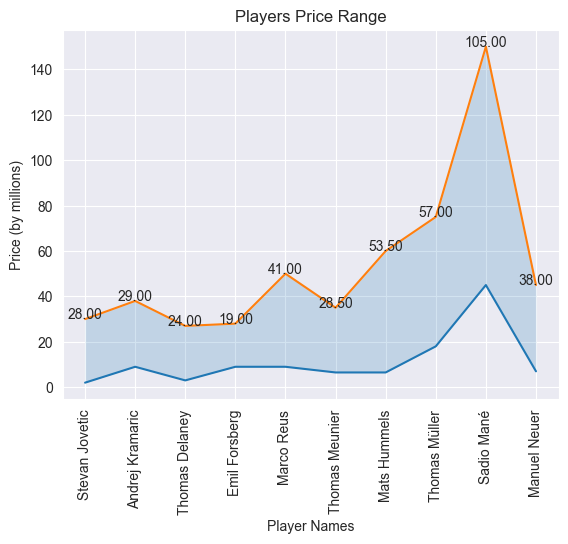

In [3]:
old_player_df = player_df[(player_df['max_price'] - player_df['price'] > 0) & (player_df['max_price'] > 25) & (player_df['age'] > 30)].copy()

old_player_df['price_difference'] = old_player_df['max_price'] - old_player_df['price']
old_player_df = old_player_df.sort_values(by=['Unnamed: 0'], ascending=False)

old_player_df[['max_price','price']]

plt.plot(old_player_df['full_name'], old_player_df['price'])
plt.plot(old_player_df['full_name'], old_player_df['max_price'])

plt.fill_between(old_player_df['full_name'], old_player_df['price'], old_player_df['max_price'], alpha = 0.2)

for index, row in old_player_df.iterrows():
    #plt.vlines(row['full_name'], row['price'], row['max_price'], color = 'grey', linestyle = 'dashed')
    
    plt.text(row['full_name'], row['price'] + (5 + row['price_difference']), f"{row['price_difference']:.2f}", ha = 'center', va = 'top')

plt.xticks(rotation = 90)
plt.xlabel('Player Names')
plt.ylabel('Price (by millions)')
plt.title('Players Price Range')

Text(0.5, 1.0, 'Players Price Range')

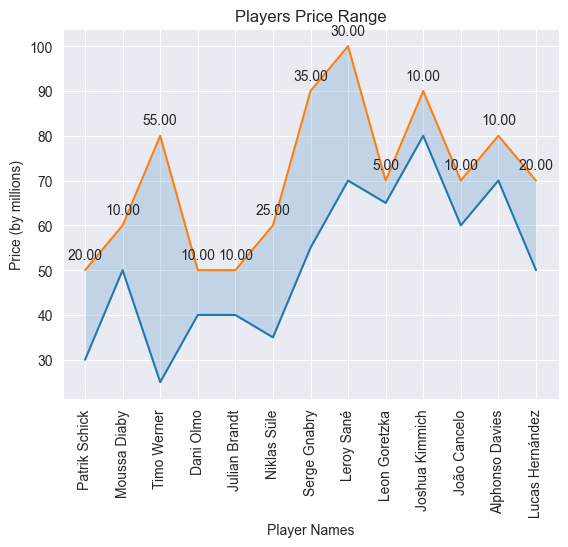

In [4]:
young_player_df = player_df[(player_df['max_price'] - player_df['price'] > 0) & (player_df['max_price'] > 45) & (player_df['age'] < 30)].copy()

young_player_df['price_difference'] = young_player_df['max_price'] - young_player_df['price']
young_player_df = young_player_df.sort_values(by=['Unnamed: 0'], ascending=False)

young_player_df[['max_price','price']]

plt.plot(young_player_df['full_name'], young_player_df['price'])
plt.plot(young_player_df['full_name'], young_player_df['max_price'])

plt.fill_between(young_player_df['full_name'], young_player_df['price'], young_player_df['max_price'], alpha = 0.2)

for index, row in young_player_df.iterrows():
    #plt.vlines(row['full_name'], row['price'], row['max_price'], color = 'grey', linestyle = 'dashed')
    
    plt.text(row['full_name'], row['price'] + (5 + row['price_difference']), f"{row['price_difference']:.2f}", ha = 'center', va = 'top')

plt.xticks(rotation = 90)
plt.xlabel('Player Names')
plt.ylabel('Price (by millions)')
plt.title('Players Price Range')

In [5]:
visual = pd.crosstab(player_df['club'], player_df['age'], margins = True)
visual

age,17,18,19,20,21,22,23,24,25,26,...,31,32,33,34,35,36,37,38,39,All
club,,,,,,,,,,,,,,,,,,,,,
1.FC Köln,0,0,0,1,3,2,2,3,3,1,...,2,1,0,0,0,0,0,0,0,27
1.FC Köln II,0,0,1,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1.FC Köln U19,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.FSV Mainz 05,1,2,1,0,2,1,1,4,2,2,...,2,0,0,0,0,0,0,0,0,27
B. Dortmund II,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
B. Leverkusen,0,1,0,3,1,5,2,2,1,2,...,1,0,2,0,0,0,0,0,0,27
Bayern Munich,2,1,0,3,0,1,2,1,1,1,...,2,0,2,3,0,0,1,0,0,27
Bor. Dortmund,1,3,2,1,2,1,2,2,3,0,...,1,1,1,1,1,0,0,0,0,30
Bor. M'gladbach,0,2,2,1,2,1,1,2,1,3,...,0,2,1,1,1,0,0,0,0,27


In [6]:
def group_teams(club):
    if club in ['1.FC Köln II', '1.FC Köln U19', '1.FC Köln']:
        return '1.FC Köln'
    elif club in ['B. Dortmund II', 'B. Dortmund', 'Bor. Dortmund']:
        return 'Bor. Dortmund'
    elif club in ['FC Augsburg', 'FC Augsburg U19']:
        return 'FC Augsburg'
    elif club in ['Hertha BSC', 'Hertha BSC U19', 'Hertha BSC U17', 'Hertha BSC II']:
        return 'Hertha BSC'
    elif club in ['RB Leipzig', 'RB Leipzig U17', 'RB Leipzig U19']:
        return 'RB Leipzig'
    elif club in ['Werder Bremen', 'W. Bremen II', 'W. Bremen U19']:
        return 'Werder Bremen'
    else:
        return club

def group_position(position):
    if position in ['Attack - Centre-Forward', 'Attack - Left Winger', 'Attack - Right Winger', 'Attack - Second Striker']:
        return 'attacker'
    elif position in ['Defender - Centre-Back', 'Defender - Left-Back', 'Defender - Right-Back']:
        return 'defender'
    elif position in ['midfield - Right Midfield', 'midfield - Left Midfield', 'midfield - Attacking Midfield', 'midfield - Central Midfield', 'midfield - Defensive Midfield']:
        return 'midfield'
    else:
        return position

player_df['group_position'] = player_df['position'].apply(group_position)
player_df['group_club'] = player_df['club'].apply(group_teams)

In [7]:
player_posnum_df = player_df.copy()

def num_positions(group_position):
    if group_position == 'attacker':
        return 1
    elif group_position == 'midfield':
        return 2
    elif group_position == 'defender':
        return 3
    else:
        return 4
    
player_posnum_df['group_position'] = player_posnum_df['group_position'].apply(num_positions)

<Axes: title={'center': 'price'}, xlabel='group_position2'>

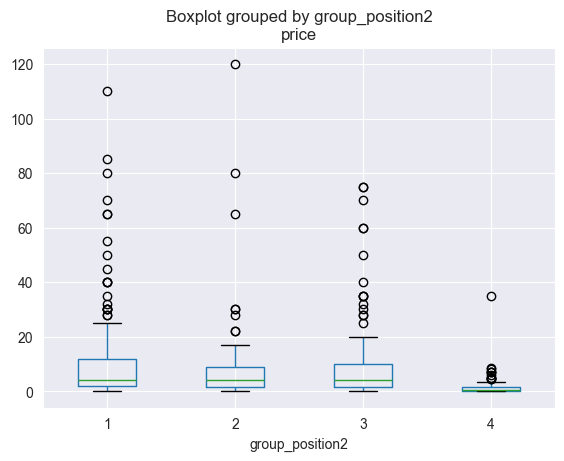

In [8]:
def group_position2(position):
    if position in ['Attack - Centre-Forward', 'Attack - Left Winger', 'Attack - Right Winger', 'Attack - Second Striker', 'midfield - Attacking Midfield']:
        return 'attacker'
    elif position in ['Defender - Centre-Back', 'Defender - Left-Back', 'Defender - Right-Back']:
        return 'defender'
    elif position in ['midfield - Right Midfield', 'midfield - Left Midfield', 'midfield - Central Midfield', 'midfield - Defensive Midfield']:
        return 'midfield'
    else:
        return position
    
player_df['group_position2'] = player_df['position'].apply(group_position2)
player_df['group_position2'] = player_df['group_position2'].apply(num_positions)
player_df.boxplot(column = 'price', by = 'group_position2')

<Axes: xlabel='group_club'>

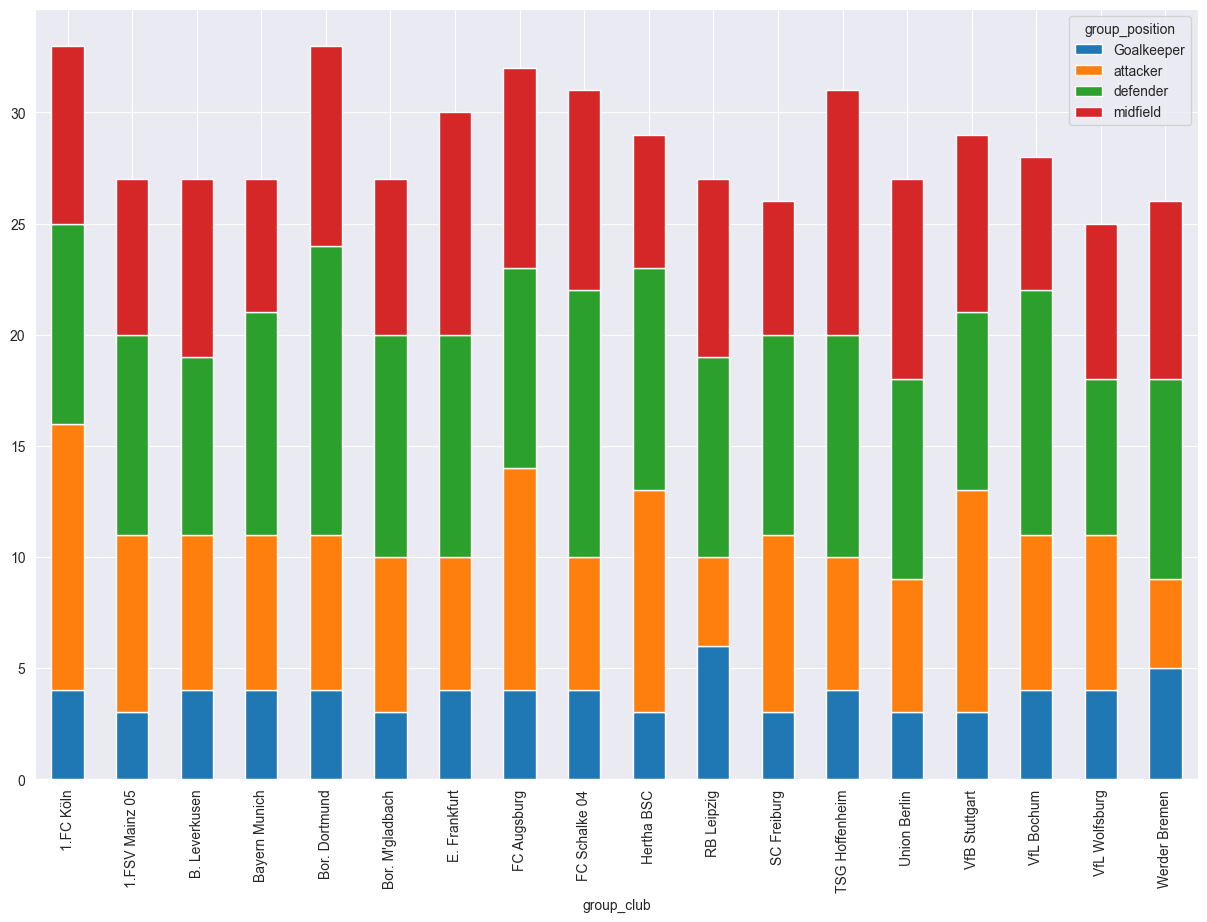

In [9]:
visual = pd.crosstab(player_df['group_club'], player_df['group_position'])
visual.plot.bar(stacked = True, figsize=(15,10))

In [10]:
player_df['group_club'].unique()

array(['Bayern Munich', 'Bor. Dortmund', 'RB Leipzig', 'B. Leverkusen',
       'E. Frankfurt', "Bor. M'gladbach", 'VfL Wolfsburg', 'SC Freiburg',
       'TSG Hoffenheim', 'Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'Werder Bremen',
       'FC Schalke 04', 'VfL Bochum'], dtype=object)

Text(0.5, 0, 'Price (by millions)')

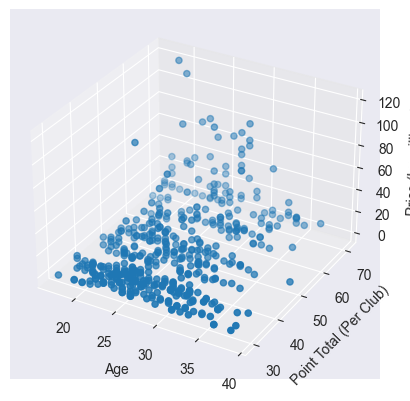

In [11]:
def point_total(group_club):
    if group_club == 'Bayern Munich':
        return 71
    elif group_club == 'Bor. Dortmund':
        return 71
    elif group_club == 'RB Leipzig':
        return 66
    elif group_club == 'B. Leverkusen':
        return 50
    elif group_club == 'E. Frankfurt':
        return 50
    elif group_club == 'Bor. M\'gladbach':
        return 43
    elif group_club == 'VfL Wolfsburg':
        return 49
    elif group_club == 'SC Freiburg':
        return 59
    elif group_club == 'TSG Hoffenheim':
        return 36
    elif group_club == 'Union Berlin':
        return 62
    elif group_club == 'FC Augsburg':
        return 34
    elif group_club == 'VfB Stuttgart':
        return 33
    elif group_club == '1.FSV Mainz 05':
        return 46
    elif group_club == '1.FC Köln':
        return 42
    elif group_club == 'Hertha BSC':
        return 29
    elif group_club == 'Werder Bremen':
        return 36
    elif group_club == 'FC Schalke 04':
        return 31
    elif group_club == 'VfL Bochum':
        return 35
    
points_df = player_df.copy()

points_df['club_pt_total'] = points_df['group_club'].apply(point_total)
points_df['rank'] = points_df['Unnamed: 0']

#points_df.plot.scatter(x = 'price', y = 'club_pt_total')

ax = plt.axes(projection = "3d")
ax.scatter(points_df['age'], points_df['club_pt_total'], points_df['price'])
plt.xlabel('Age')
plt.ylabel('Point Total (Per Club)')
ax.set_zlabel('Price (by millions)')

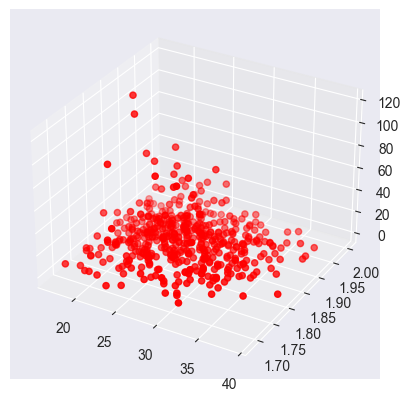

In [12]:
ax = plt.axes(projection = "3d")
ax.scatter(points_df['age'], points_df['height'], points_df['price'], color = 'red')

Text(0.5, 1.0, 'KNN Regression Model to Predict Player Prices in the 2022-23 Bundesliga Season')

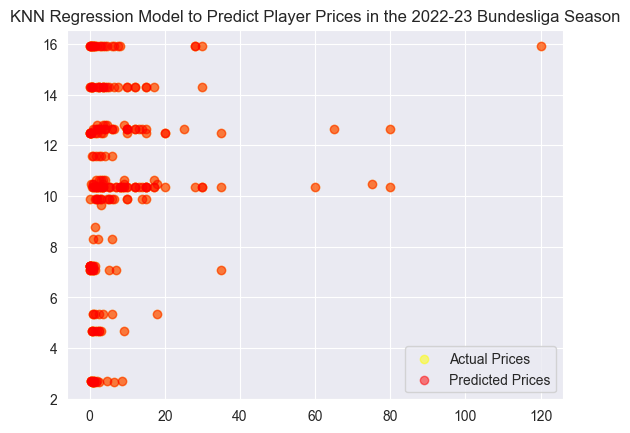

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

player_df = points_df.copy()
player_df['price'] = player_df['price'].fillna(0)
player_df['max_price'] = player_df['max_price'].fillna(0)

#player foot classification
player_df['foot_choice'] = np.where(player_df['foot'] == 'left', 0,1)

#player age classification
bins = [0, 23, 30, np.inf]
labels = [0, 1, 2]
player_df['age_group'] = np.where(player_df['age'].notnull(), pd.cut(player_df['age'], bins = bins, labels = labels), None)

#position group classification
player_df['position_group'] = np.where(player_df['group_position'].str.contains('attacker'), 0, np.where(player_df['group_position'].str.contains('midfield'), 1, np.where(player_df['group_position'].str.contains('defender'), 2, 3) ))

#nationality classification
player_df['nationality_group'] = np.where(player_df['nationality'] == 1, 1, 2)


#cleaning data a bit
del player_df['rank'], player_df['outfitter'], player_df['group_position2'], player_df['club_pt_total'], player_df['group_club']


#scaling data
scaler = MinMaxScaler()
columns_to_scale = ['foot_choice', 'age_group', 'position_group', 'nationality_group']
player_df[columns_to_scale] = scaler.fit_transform(player_df[columns_to_scale])


#splitting data into training and testing data
X = player_df[['foot_choice', 'age_group', 'position_group', 'nationality_group']]
y = player_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 23)


#applying KNN to the data
knn_regressor = KNeighborsRegressor(n_neighbors = 23)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)



plt.scatter(y_test, y_pred, alpha=0.5, c='yellow', label='Actual Prices')
plt.scatter(y_test, y_pred, alpha=0.5, c='red', label='Predicted Prices')
plt.legend()
plt.title('KNN Regression Model to Predict Player Prices in the 2022-23 Bundesliga Season')

In [25]:
mse = mean_squared_error(y_test, y_pred)
price_range = y.max() - y.min()

accuracy = 100 * (1-(mse/(price_range * price_range)))

print(accuracy)

98.67555896103998


In [27]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

8.807916245365687
